In [192]:
# importing necessary libraries
import pandas as pd
import numpy as np
import geopy
import json
import geopy.distance
import itertools

In [193]:
#reading Walmart geo-data table
data_Walmart_GEO=pd.read_excel('/Users/vladimirant/Desktop/Walmart Project/GEODATA/data_Walmart_locatons_main.xlsx')

In [194]:
#reading Wamart geo-data specifically for NV
data_Walmart_NV_GEO=pd.read_excel('/Users/vladimirant/Desktop/Walmart Project/GEODATA/data_Walmart_locatons_main_NV.xlsx')

In [195]:
#Nevada census tracts geodata
data_ct_GEO_NV=pd.read_excel('/Users/vladimirant/data_low_inc_geo_NV.xlsx')

In [196]:
#renaming colomns for future work
data_ct_GEO_NV.rename(columns={'Population over 65':'Population_over_65'},inplace=True)
data_ct_GEO_NV.rename(columns={'Geographic Area Name':'Geographic_Area_Name'}, inplace=True)

In [197]:
data_ct_GEO_NV

,Unnamed: 0,id,Geographic_Area_Name,County,State,Total Population,Population_over_65,% of population over 65,Estimate!!Median income (dollars)!!FAMILIES!!Families,Civilian noninstitutionalized population,...,"%, Population 25 years and over!!Bachelor's degree or higher","%, Labor Force Participation Rate!!Population 16 years and over","%, Labor Force Participation Rate!!Population 20 to 64 years","%, Estimate!!Unemployment rate!!Population 16 years and over","%, Estimate!!Unemployment rate!!Population 20 to 64 years",MedianStateIncome,GEOID,Unnamed: 0.1,CENTLAT,CENTLON
0,13191,1400000US32001950301,Census Tract 9503.01,Churchill County,Nevada,3940,607,0.154,45703,3736,...,0.105,0.603,0.762,0.099,0.105,76124,32001950301,1,39.474623,-118.768291
1,13192,1400000US32001950302,Census Tract 9503.02,Churchill County,Nevada,5203,604,0.116,47401,4919,...,0.194,0.647,0.766,0.036,0.038,76124,32001950302,2,39.473174,-118.788695
2,13193,1400000US32001950500,Census Tract 9505,Churchill County,Nevada,1427,343,0.240,55833,1422,...,0.131,0.530,0.710,0.093,0.073,76124,32001950500,4,39.585762,-118.680373
3,13194,1400000US32003000101,Census Tract 1.01,Clark County,Nevada,6832,752,0.110,59953,6832,...,0.112,0.670,0.792,0.079,0.068,76124,32003000101,7,36.181564,-115.192397
4,13195,1400000US32003000103,Census Tract 1.03,Clark County,Nevada,6467,559,0.086,51386,6467,...,0.048,0.666,0.758,0.042,0.044,76124,32003000103,8,36.162821,-115.232953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,13406,1400000US32031940200,Census Tract 9402,Washoe County,Nevada,1525,252,0.165,51429,1525,...,0.084,0.628,0.771,0.150,0.160,76124,32031940200,754,40.091129,-119.529332
216,13407,1400000US32033970100,Census Tract 9701,White Pine County,Nevada,1472,344,0.234,60417,1472,...,0.163,0.530,0.719,0.000,0.000,76124,32033970100,761,39.566287,-114.789287
217,13408,1400000US32510000502,Census Tract 5.02,Carson City,Nevada,3193,737,0.231,54783,3164,...,0.128,0.583,0.774,0.041,0.040,76124,32510000502,769,39.175139,-119.754117
218,13409,1400000US32510000900,Census Tract 9,Carson City,Nevada,5350,1141,0.213,57228,5304,...,0.077,0.640,0.808,0.094,0.074,76124,32510000900,775,39.188558,-119.731005


In [198]:
data_Walmart_NV_GEO

,Unnamed: 0,objectid,gps,state,unit_type,ad1,ad2,ad3,zipcode
0,605,15797,"[-115.122253, 36.080571]",NV,WM Supercenter,6005 S EASTERN AVE,LAS VEGAS,CLARK,89119-3135
1,630,15823,"[-115.246524, 36.123214]",NV,WM Supercenter,3615 S RAINBOW BLVD,LAS VEGAS,CLARK,89103-1057
2,702,15895,"[-119.778406, 39.111782]",NV,WM Supercenter,3770 US HIGHWAY 395 S,CARSON CITY,DOUGLAS,89705-6898
3,1017,16238,"[-115.293821, 36.094051]",NV,WM Supercenter,5200 S FORT APACHE RD,LAS VEGAS,CLARK,89148-1722
4,1049,16273,"[-115.994849, 36.214987]",NV,WM Supercenter,300 S HIGHWAY 160,PAHRUMP,NYE,89048-2132
5,1646,17022,"[-119.721196, 38.923888]",NV,WM Supercenter,1511 GRANT ST,GARDNERVILLE,DOUGLAS,89410-7824
6,2293,18013,"[-114.977327, 36.038822]",NV,WM Supercenter,300 E LAKE MEAD PKWY,HENDERSON,CLARK,89015-5576
7,2352,18075,"[-119.781714, 39.528964]",NV,WM Supercenter,2425 E 2ND ST,RENO,WASHOE,89502-1218
8,2433,18166,"[-119.798959, 39.480514]",NV,WM Supercenter,4855 KIETZKE LN,RENO,WASHOE,89509-6549
9,2434,18167,"[-119.798959, 39.480514]",NV,WM Supercenter,4855 KIETZKE LN,RENO,WASHOE,89509-6549


In [199]:
#formating colomns

data_Walmart_NV_GEO['gps']=data_Walmart_NV_GEO['gps'].str.strip('][')
data_Walmart_NV_GEO['gps']=data_Walmart_NV_GEO['gps'].str.split(', ')

In [202]:
#Playing with the data to check if the distances can be measured

cord1=(data_ct_GEO_NV.iloc[0].CENTLAT,data_ct_GEO_NV.iloc[0].CENTLON)
cord2=(float(data_Walmart_NV_GEO.iloc[0].gps[1]),float(data_Walmart_NV_GEO.iloc[0].gps[0]))

#geopy.distance.distance((data_ct_GEO_NV.iloc[0].CENTLAT,data_ct_GEO_NV.iloc[0].CENTLON),(data_Walmart_NV_GEO.iloc[0].gps(1),data_Walmart_NV_GEO.iloc[0].gps(0)).miles

In [203]:
data_Walmart_NV_GEO

,Unnamed: 0,objectid,gps,state,unit_type,ad1,ad2,ad3,zipcode
0,605,15797,"[-115.122253, 36.080571]",NV,WM Supercenter,6005 S EASTERN AVE,LAS VEGAS,CLARK,89119-3135
1,630,15823,"[-115.246524, 36.123214]",NV,WM Supercenter,3615 S RAINBOW BLVD,LAS VEGAS,CLARK,89103-1057
2,702,15895,"[-119.778406, 39.111782]",NV,WM Supercenter,3770 US HIGHWAY 395 S,CARSON CITY,DOUGLAS,89705-6898
3,1017,16238,"[-115.293821, 36.094051]",NV,WM Supercenter,5200 S FORT APACHE RD,LAS VEGAS,CLARK,89148-1722
4,1049,16273,"[-115.994849, 36.214987]",NV,WM Supercenter,300 S HIGHWAY 160,PAHRUMP,NYE,89048-2132
5,1646,17022,"[-119.721196, 38.923888]",NV,WM Supercenter,1511 GRANT ST,GARDNERVILLE,DOUGLAS,89410-7824
6,2293,18013,"[-114.977327, 36.038822]",NV,WM Supercenter,300 E LAKE MEAD PKWY,HENDERSON,CLARK,89015-5576
7,2352,18075,"[-119.781714, 39.528964]",NV,WM Supercenter,2425 E 2ND ST,RENO,WASHOE,89502-1218
8,2433,18166,"[-119.798959, 39.480514]",NV,WM Supercenter,4855 KIETZKE LN,RENO,WASHOE,89509-6549
9,2434,18167,"[-119.798959, 39.480514]",NV,WM Supercenter,4855 KIETZKE LN,RENO,WASHOE,89509-6549


In [204]:
#checking how can i acess the coordinates
data_ct_GEO_NV.iloc[0].CENTLAT

39.4746227

In [205]:
#checking how can i acess the coordinates and their format
data_Walmart_NV_GEO.iloc[0].gps[1]

'36.080571'

In [206]:
#playing with the data, check how can i measure distance
cord1=(data_ct_GEO_NV.iloc[0].CENTLAT,data_ct_GEO_NV.iloc[0].CENTLON)
cord2=(float(data_Walmart_NV_GEO.iloc[0].gps[1]),float(data_Walmart_NV_GEO.iloc[0].gps[0]))


In [207]:
#checking if i can measure the distances
geopy.distance.distance((data_ct_GEO_NV.iloc[0].CENTLAT,data_ct_GEO_NV.iloc[0].CENTLON),(float(data_Walmart_NV_GEO.iloc[0].gps[1]),float(data_Walmart_NV_GEO.iloc[0].gps[0]))).miles

307.55572826877835

In [208]:
#Creating a list of walmarts and all necessary features and distances 
# to all low-income census tracts in NV
List=[]
for i in range(0,30):
    for j in range (0,220):
        i=i
        j=j
        walmart_objectid=data_Walmart_NV_GEO.iloc[i].objectid
        walmart_gps=data_Walmart_NV_GEO.iloc[i].gps
        walmart_ad1=data_Walmart_NV_GEO.iloc[i].ad1
        walmart_ad2=data_Walmart_NV_GEO.iloc[i].ad2
        walmart_ad3=data_Walmart_NV_GEO.iloc[i].ad3
        walmart_zip=data_Walmart_NV_GEO.iloc[i].zipcode
        ct_geoid=data_ct_GEO_NV.iloc[j].GEOID
        ct_name=data_ct_GEO_NV.iloc[j].Geographic_Area_Name
        ct_county=data_ct_GEO_NV.iloc[j].County
        ct_state=data_ct_GEO_NV.iloc[j].State
        ct_lat=data_ct_GEO_NV.iloc[j].CENTLAT
        ct_long=data_ct_GEO_NV.iloc[j].CENTLON
        ct_elderly_pop=data_ct_GEO_NV.iloc[j].Population_over_65
        distanceWtoCT=geopy.distance.distance((data_ct_GEO_NV.iloc[j].CENTLAT,data_ct_GEO_NV.iloc[j].CENTLON),(float(data_Walmart_NV_GEO.iloc[i].gps[1]),float(data_Walmart_NV_GEO.iloc[i].gps[0]))).miles
        row=[walmart_objectid,walmart_gps,walmart_ad1,walmart_ad2,walmart_ad3,walmart_zip,ct_geoid,ct_name,ct_county,ct_state,ct_lat,ct_long,ct_elderly_pop,distanceWtoCT]
        List.append(row)

In [144]:
List

[[15797,
  ['-115.122253', '36.080571'],
  '6005 S EASTERN AVE',
  'LAS VEGAS',
  'CLARK',
  '89119-3135',
  32001950301,
  'Census Tract 9503.01',
  'Churchill County',
  'Nevada',
  39.4746227,
  -118.7682909,
  607,
  307.55572826877835],
 [15797,
  ['-115.122253', '36.080571'],
  '6005 S EASTERN AVE',
  'LAS VEGAS',
  'CLARK',
  '89119-3135',
  32001950302,
  'Census Tract 9503.02',
  'Churchill County',
  'Nevada',
  39.4731745,
  -118.7886951,
  604,
  308.2064274284609],
 [15797,
  ['-115.122253', '36.080571'],
  '6005 S EASTERN AVE',
  'LAS VEGAS',
  'CLARK',
  '89119-3135',
  32001950500,
  'Census Tract 9505',
  'Churchill County',
  'Nevada',
  39.585762,
  -118.6803725,
  343,
  310.2965642577034],
 [15797,
  ['-115.122253', '36.080571'],
  '6005 S EASTERN AVE',
  'LAS VEGAS',
  'CLARK',
  '89119-3135',
  32003000101,
  'Census Tract 1.01',
  'Clark County',
  'Nevada',
  36.1815643,
  -115.1923971,
  752,
  7.992502938767625],
 [15797,
  ['-115.122253', '36.080571'],
  '60

In [211]:
#Transfering list to data frame
data_distnces_NV=pd.DataFrame(List)

In [212]:
data_distnces_NV

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,15797,"[-115.122253, 36.080571]",6005 S EASTERN AVE,LAS VEGAS,CLARK,89119-3135,32001950301,Census Tract 9503.01,Churchill County,Nevada,39.474623,-118.768291,607,307.555728
1,15797,"[-115.122253, 36.080571]",6005 S EASTERN AVE,LAS VEGAS,CLARK,89119-3135,32001950302,Census Tract 9503.02,Churchill County,Nevada,39.473174,-118.788695,604,308.206427
2,15797,"[-115.122253, 36.080571]",6005 S EASTERN AVE,LAS VEGAS,CLARK,89119-3135,32001950500,Census Tract 9505,Churchill County,Nevada,39.585762,-118.680373,343,310.296564
3,15797,"[-115.122253, 36.080571]",6005 S EASTERN AVE,LAS VEGAS,CLARK,89119-3135,32003000101,Census Tract 1.01,Clark County,Nevada,36.181564,-115.192397,752,7.992503
4,15797,"[-115.122253, 36.080571]",6005 S EASTERN AVE,LAS VEGAS,CLARK,89119-3135,32003000103,Census Tract 1.03,Clark County,Nevada,36.162821,-115.232953,559,8.396764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,20490,"[-119.216856, 39.611238]",1550 NEWLANDS DR E,FERNLEY,LYON,89408-8910,32031940200,Census Tract 9402,Washoe County,Nevada,40.091129,-119.529332,252,37.044279
6596,20490,"[-119.216856, 39.611238]",1550 NEWLANDS DR E,FERNLEY,LYON,89408-8910,32033970100,Census Tract 9701,White Pine County,Nevada,39.566287,-114.789287,344,236.332198
6597,20490,"[-119.216856, 39.611238]",1550 NEWLANDS DR E,FERNLEY,LYON,89408-8910,32510000502,Census Tract 5.02,Carson City,Nevada,39.175139,-119.754117,737,41.618975
6598,20490,"[-119.216856, 39.611238]",1550 NEWLANDS DR E,FERNLEY,LYON,89408-8910,32510000900,Census Tract 9,Carson City,Nevada,39.188558,-119.731005,1141,40.093984


In [213]:
#creating column names for pandas dataframe
data_distnces_NV.columns=['walmart_id','walmart_gps','walmart_ad1','walmart_ad2','walmart_ad3','walmart_zip','ct_geoid','ct_name','ct_county','ct_state','ct_lat','ct_long','ct_elderly_pop','distanceWtoCT']

In [214]:
#transforming data to numeric
data_distnces_NV['ct_elderly_pop']=pd.to_numeric(data_distnces_NV['ct_elderly_pop'])
data_distnces_NV['distanceWtoCT']=pd.to_numeric(data_distnces_NV['distanceWtoCT'])
data_distnces_NV

,walmart_id,walmart_gps,walmart_ad1,walmart_ad2,walmart_ad3,walmart_zip,ct_geoid,ct_name,ct_county,ct_state,ct_lat,ct_long,ct_elderly_pop,distanceWtoCT
0,15797,"[-115.122253, 36.080571]",6005 S EASTERN AVE,LAS VEGAS,CLARK,89119-3135,32001950301,Census Tract 9503.01,Churchill County,Nevada,39.474623,-118.768291,607,307.555728
1,15797,"[-115.122253, 36.080571]",6005 S EASTERN AVE,LAS VEGAS,CLARK,89119-3135,32001950302,Census Tract 9503.02,Churchill County,Nevada,39.473174,-118.788695,604,308.206427
2,15797,"[-115.122253, 36.080571]",6005 S EASTERN AVE,LAS VEGAS,CLARK,89119-3135,32001950500,Census Tract 9505,Churchill County,Nevada,39.585762,-118.680373,343,310.296564
3,15797,"[-115.122253, 36.080571]",6005 S EASTERN AVE,LAS VEGAS,CLARK,89119-3135,32003000101,Census Tract 1.01,Clark County,Nevada,36.181564,-115.192397,752,7.992503
4,15797,"[-115.122253, 36.080571]",6005 S EASTERN AVE,LAS VEGAS,CLARK,89119-3135,32003000103,Census Tract 1.03,Clark County,Nevada,36.162821,-115.232953,559,8.396764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,20490,"[-119.216856, 39.611238]",1550 NEWLANDS DR E,FERNLEY,LYON,89408-8910,32031940200,Census Tract 9402,Washoe County,Nevada,40.091129,-119.529332,252,37.044279
6596,20490,"[-119.216856, 39.611238]",1550 NEWLANDS DR E,FERNLEY,LYON,89408-8910,32033970100,Census Tract 9701,White Pine County,Nevada,39.566287,-114.789287,344,236.332198
6597,20490,"[-119.216856, 39.611238]",1550 NEWLANDS DR E,FERNLEY,LYON,89408-8910,32510000502,Census Tract 5.02,Carson City,Nevada,39.175139,-119.754117,737,41.618975
6598,20490,"[-119.216856, 39.611238]",1550 NEWLANDS DR E,FERNLEY,LYON,89408-8910,32510000900,Census Tract 9,Carson City,Nevada,39.188558,-119.731005,1141,40.093984


In [215]:
#creating the table of all ct that lie in 7 miles distance from any Walmart
data_distnces_NV_7miles=data_distnces_NV.loc[data_distnces_NV['distanceWtoCT']<=7]

In [216]:
#calculating monthly demand for census tracts in the table
data_distnces_NV_7miles['DemandM_1']=np.ceil(data_distnces_NV_7miles['ct_elderly_pop']*0.1)
data_distnces_NV_7miles['DemandM_3']=np.ceil(data_distnces_NV_7miles['ct_elderly_pop']*0.1*3)
data_distnces_NV_7miles['DemandM_2']=np.ceil(data_distnces_NV_7miles['ct_elderly_pop']*0.1*2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [217]:
#saving data to excel
data_distnces_NV_7miles.to_excel("data_distnces_NV_7miles.xlsx",sheet_name='data_distnces_NV_7miles.xlsx')

In [218]:
data_distnces_NV_7miles

,walmart_id,walmart_gps,walmart_ad1,walmart_ad2,walmart_ad3,walmart_zip,ct_geoid,ct_name,ct_county,ct_state,ct_lat,ct_long,ct_elderly_pop,distanceWtoCT,DemandM_1,DemandM_3,DemandM_2
10,15797,"[-115.122253, 36.080571]",6005 S EASTERN AVE,LAS VEGAS,CLARK,89119-3135,32003000203,Census Tract 2.03,Clark County,Nevada,36.167509,-115.166873,469,6.493084,47.0,141.0,94.0
11,15797,"[-115.122253, 36.080571]",6005 S EASTERN AVE,LAS VEGAS,CLARK,89119-3135,32003000301,Census Tract 3.01,Clark County,Nevada,36.177805,-115.151184,270,6.896662,27.0,81.0,54.0
14,15797,"[-115.122253, 36.080571]",6005 S EASTERN AVE,LAS VEGAS,CLARK,89119-3135,32003000402,Census Tract 4.02,Clark County,Nevada,36.180924,-115.129976,177,6.932628,18.0,54.0,36.0
15,15797,"[-115.122253, 36.080571]",6005 S EASTERN AVE,LAS VEGAS,CLARK,89119-3135,32003000403,Census Tract 4.03,Clark County,Nevada,36.170834,-115.129915,662,6.238215,67.0,199.0,133.0
16,15797,"[-115.122253, 36.080571]",6005 S EASTERN AVE,LAS VEGAS,CLARK,89119-3135,32003000510,Census Tract 5.10,Clark County,Nevada,36.180418,-115.120301,358,6.885126,36.0,108.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6264,20474,"[-115.248991, 36.065017]",7200 ARROYO CROSSING PKWY,LAS VEGAS,CLARK,89113-4058,32003003260,Census Tract 32.60,Clark County,Nevada,36.162197,-115.268479,739,6.788507,74.0,222.0,148.0
6337,20474,"[-115.248991, 36.065017]",7200 ARROYO CROSSING PKWY,LAS VEGAS,CLARK,89113-4058,32003005825,Census Tract 58.25,Clark County,Nevada,36.125994,-115.288033,894,4.737986,90.0,269.0,179.0
6338,20474,"[-115.248991, 36.065017]",7200 ARROYO CROSSING PKWY,LAS VEGAS,CLARK,89113-4058,32003005848,Census Tract 58.48,Clark County,Nevada,36.106674,-115.301472,397,4.108030,40.0,120.0,80.0
6344,20474,"[-115.248991, 36.065017]",7200 ARROYO CROSSING PKWY,LAS VEGAS,CLARK,89113-4058,32003006800,Census Tract 68,Clark County,Nevada,36.084978,-115.153889,482,5.498108,49.0,145.0,97.0


In [219]:
#saving data to excel
data_distnces_NV_7miles.to_excel("data_distnces_NV_7miles.xlsx",sheet_name='data_distnces_NV_7miles')


In [220]:
#Creating list of demand estimate for every Walmart
# assuming 2 orders per month per avaergae elderly person
List2=[]
for i in data_distnces_NV_7miles['walmart_id']:
    i=i
    total = data_distnces_NV_7miles.loc[data_distnces_NV_7miles['walmart_id'] == i, 'DemandM_2'].sum()
    row=[i,total]
    List2.append(row)

In [221]:
List2

[[15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9107.0],
 [15797, 9

In [222]:
#converting list to DataFrame
data_MOrders_NV=pd.DataFrame(List2)

In [223]:
data_MOrders_NV

,0,1
0,15797,9107.0
1,15797,9107.0
2,15797,9107.0
3,15797,9107.0
4,15797,9107.0
...,...,...
913,20474,3792.0
914,20474,3792.0
915,20474,3792.0
916,20474,3792.0


In [224]:
#Creating column names
data_MOrders_NV.columns=['walmart_id','total_M_orders']

In [225]:
data_MOrders_NV_2550=data_MOrders_NV.loc[data_MOrders_NV['total_M_orders']>2550]
data_MOrders_NV_2550

,walmart_id,total_M_orders
0,15797,9107.0
1,15797,9107.0
2,15797,9107.0
3,15797,9107.0
4,15797,9107.0
...,...,...
912,20474,3792.0
913,20474,3792.0
914,20474,3792.0
915,20474,3792.0


In [226]:
#claculating how many census tracts are concentrated around each Walmart
counts = data_MOrders_NV_2550['walmart_id'].value_counts().to_dict()

In [227]:
counts

{19585: 121,
 19863: 116,
 19450: 96,
 15797: 93,
 18612: 90,
 15823: 73,
 18883: 43,
 20474: 37,
 19451: 35,
 16238: 34,
 18934: 19}

In [228]:
data_MOrders_NV_2550.loc[data_MOrders_NV_2550['walmart_id']==18934]

,walmart_id,total_M_orders
442,18934,2583.0
443,18934,2583.0
444,18934,2583.0
445,18934,2583.0
446,18934,2583.0
447,18934,2583.0
448,18934,2583.0
449,18934,2583.0
450,18934,2583.0
451,18934,2583.0


In [229]:
data_distnces_NV_7miles.loc[data_distnces_NV_7miles['walmart_id']==20474]

,walmart_id,walmart_gps,walmart_ad1,walmart_ad2,walmart_ad3,walmart_zip,ct_geoid,ct_name,ct_county,ct_state,ct_lat,ct_long,ct_elderly_pop,distanceWtoCT,DemandM_1,DemandM_3,DemandM_2
6164,20474,"[-115.248991, 36.065017]",7200 ARROYO CROSSING PKWY,LAS VEGAS,CLARK,89113-4058,32003000103,Census Tract 1.03,Clark County,Nevada,36.162821,-115.232953,559,6.802791,56.0,168.0,112.0
6166,20474,"[-115.248991, 36.065017]",7200 ARROYO CROSSING PKWY,LAS VEGAS,CLARK,89113-4058,32003000107,Census Tract 1.07,Clark County,Nevada,36.162678,-115.214902,545,6.998387,55.0,164.0,109.0
6194,20474,"[-115.248991, 36.065017]",7200 ARROYO CROSSING PKWY,LAS VEGAS,CLARK,89113-4058,32003001004,Census Tract 10.04,Clark County,Nevada,36.152119,-115.197961,1570,6.649613,157.0,471.0,314.0
6216,20474,"[-115.248991, 36.065017]",7200 ARROYO CROSSING PKWY,LAS VEGAS,CLARK,89113-4058,32003002201,Census Tract 22.01,Clark County,Nevada,36.136341,-115.180835,1163,6.223063,117.0,349.0,233.0
6217,20474,"[-115.248991, 36.065017]",7200 ARROYO CROSSING PKWY,LAS VEGAS,CLARK,89113-4058,32003002203,Census Tract 22.03,Clark County,Nevada,36.141187,-115.201465,508,5.886639,51.0,153.0,102.0
6218,20474,"[-115.248991, 36.065017]",7200 ARROYO CROSSING PKWY,LAS VEGAS,CLARK,89113-4058,32003002204,Census Tract 22.04,Clark County,Nevada,36.137500,-115.195017,197,5.839217,20.0,60.0,40.0
6219,20474,"[-115.248991, 36.065017]",7200 ARROYO CROSSING PKWY,LAS VEGAS,CLARK,89113-4058,32003002206,Census Tract 22.06,Clark County,Nevada,36.129733,-115.198179,457,5.290929,46.0,138.0,92.0
6220,20474,"[-115.248991, 36.065017]",7200 ARROYO CROSSING PKWY,LAS VEGAS,CLARK,89113-4058,32003002207,Census Tract 22.07,Clark County,Nevada,36.133869,-115.204071,114,5.371546,12.0,35.0,23.0
6221,20474,"[-115.248991, 36.065017]",7200 ARROYO CROSSING PKWY,LAS VEGAS,CLARK,89113-4058,32003002403,Census Tract 24.03,Clark County,Nevada,36.125368,-115.150477,516,6.906759,52.0,155.0,104.0
6223,20474,"[-115.248991, 36.065017]",7200 ARROYO CROSSING PKWY,LAS VEGAS,CLARK,89113-4058,32003002405,Census Tract 24.05,Clark County,Nevada,36.118059,-115.150547,424,6.612351,43.0,128.0,85.0


In [230]:
#3792.0 monthly average monthly demand

In [231]:
data_MOrders_NV_2550.loc[data_MOrders_NV_2550['walmart_id']==19863]

,walmart_id,total_M_orders
738,19863,11073.0
739,19863,11073.0
740,19863,11073.0
741,19863,11073.0
742,19863,11073.0
...,...,...
849,19863,11073.0
850,19863,11073.0
851,19863,11073.0
852,19863,11073.0


In [232]:
data_distnces_NV_7miles.loc[data_distnces_NV_7miles['walmart_id']==18934]

,walmart_id,walmart_gps,walmart_ad1,walmart_ad2,walmart_ad3,walmart_zip,ct_geoid,ct_name,ct_county,ct_state,ct_lat,ct_long,ct_elderly_pop,distanceWtoCT,DemandM_1,DemandM_3,DemandM_2
3839,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003003,Census Tract 30.03,Clark County,Nevada,36.183295,-115.252133,678,6.181276,68.0,204.0,136.0
3840,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003004,Census Tract 30.04,Clark County,Nevada,36.175886,-115.251746,263,6.688630,27.0,79.0,53.0
3841,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003102,Census Tract 31.02,Clark County,Nevada,36.177555,-115.234117,421,6.806273,43.0,127.0,85.0
3842,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003104,Census Tract 31.04,Clark County,Nevada,36.184877,-115.239212,520,6.240024,52.0,156.0,104.0
3843,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003220,Census Tract 32.20,Clark County,Nevada,36.183229,-115.273850,1089,6.096849,109.0,327.0,218.0
3845,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003409,Census Tract 34.09,Clark County,Nevada,36.239615,-115.240792,524,2.779599,53.0,158.0,105.0
3846,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003413,Census Tract 34.13,Clark County,Nevada,36.224943,-115.226604,682,4.064619,69.0,205.0,137.0
3847,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003415,Census Tract 34.15,Clark County,Nevada,36.209506,-115.245610,576,4.512591,58.0,173.0,116.0
3848,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003418,Census Tract 34.18,Clark County,Nevada,36.199778,-115.252466,232,5.061406,24.0,70.0,47.0
3849,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003419,Census Tract 34.19,Clark County,Nevada,36.199562,-115.234128,694,5.379693,70.0,209.0,139.0


In [233]:
data_distnces_NV_7miles.loc[data_distnces_NV_7miles['walmart_id']==18934]

,walmart_id,walmart_gps,walmart_ad1,walmart_ad2,walmart_ad3,walmart_zip,ct_geoid,ct_name,ct_county,ct_state,ct_lat,ct_long,ct_elderly_pop,distanceWtoCT,DemandM_1,DemandM_3,DemandM_2
3839,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003003,Census Tract 30.03,Clark County,Nevada,36.183295,-115.252133,678,6.181276,68.0,204.0,136.0
3840,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003004,Census Tract 30.04,Clark County,Nevada,36.175886,-115.251746,263,6.688630,27.0,79.0,53.0
3841,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003102,Census Tract 31.02,Clark County,Nevada,36.177555,-115.234117,421,6.806273,43.0,127.0,85.0
3842,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003104,Census Tract 31.04,Clark County,Nevada,36.184877,-115.239212,520,6.240024,52.0,156.0,104.0
3843,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003220,Census Tract 32.20,Clark County,Nevada,36.183229,-115.273850,1089,6.096849,109.0,327.0,218.0
3845,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003409,Census Tract 34.09,Clark County,Nevada,36.239615,-115.240792,524,2.779599,53.0,158.0,105.0
3846,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003413,Census Tract 34.13,Clark County,Nevada,36.224943,-115.226604,682,4.064619,69.0,205.0,137.0
3847,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003415,Census Tract 34.15,Clark County,Nevada,36.209506,-115.245610,576,4.512591,58.0,173.0,116.0
3848,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003418,Census Tract 34.18,Clark County,Nevada,36.199778,-115.252466,232,5.061406,24.0,70.0,47.0
3849,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003419,Census Tract 34.19,Clark County,Nevada,36.199562,-115.234128,694,5.379693,70.0,209.0,139.0


In [234]:
#### Now i am switching to the case where 

In [237]:
#table for Walmart with id=18934 combining all the census tracts that lie in 7 miles distance
data_WAL_id_18934=data_distnces_NV_7miles.loc[data_distnces_NV_7miles['walmart_id']==18934]

In [236]:
#import itertools

In [238]:
# creating list of census tracts geoids wor Walmart id-18934
ct_list=list(data_WAL_id_18934['ct_geoid'])
len(ct_list)
#All the ct_geo_ids are integers are ranked from smallest to largest

19

In [49]:
#ct_list.append(18934)

In [239]:
#creating variable equal to Walmart coordinates
Walmart_18394_coord=(36.271625,-115.271048)

In [240]:
#creating the coordinates of each census tract
data_WAL_id_18934['census_coord']=list(zip(data_WAL_id_18934['ct_lat'],data_WAL_id_18934['ct_long']))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [251]:
data_WAL_id_18934['census_coord']

3839           (36.1832951, -115.2521329)
3840    (36.17588610000001, -115.2517457)
3841    (36.17755529999999, -115.2341174)
3842             (36.184877, -115.239212)
3843    (36.18322910000001, -115.2738498)
3845           (36.2396146, -115.2407916)
3846           (36.2249429, -115.2266042)
3847           (36.2095059, -115.2456103)
3848           (36.1997776, -115.2524662)
3849           (36.1995618, -115.2341282)
3850           (36.1992602, -115.2148496)
3851           (36.1922133, -115.2342586)
3852           (36.1894852, -115.2165348)
3853    (36.20934260000001, -115.2112784)
3854           (36.2017264, -115.2028354)
3855           (36.1927977, -115.1977176)
3860           (36.2077284, -115.1827474)
3862            (36.3000836, -115.179923)
3863           (36.2680682, -115.1655868)
Name: census_coord, dtype: object

In [252]:
ct_list

[32003003003,
 32003003004,
 32003003102,
 32003003104,
 32003003220,
 32003003409,
 32003003413,
 32003003415,
 32003003418,
 32003003419,
 32003003420,
 32003003422,
 32003003423,
 32003003427,
 32003003428,
 32003003429,
 32003003616,
 32003003621,
 32003003635]

In [245]:
ct_list2=ct_list.copy()
#EMPTY_LIST.append(18934)

In [246]:
#creating list of cts and Walmart id
ct_list2.append(18934)

In [247]:
ct_list2

[32003003003,
 32003003004,
 32003003102,
 32003003104,
 32003003220,
 32003003409,
 32003003413,
 32003003415,
 32003003418,
 32003003419,
 32003003420,
 32003003422,
 32003003423,
 32003003427,
 32003003428,
 32003003429,
 32003003616,
 32003003621,
 32003003635,
 18934]

In [248]:
#creating list of all possible combinations of 2-node ways
ones=list(itertools.product(ct_list2, repeat=2))

In [249]:
#creaing list of 1 mode ways with start and finish at Walmart
ONES=[]
for i in ones:
    if i[0]==18934 and i[1]!=18934:
        i=list(i)
        i.append(18934)
        ONES.append(i)

In [306]:
ONES

[[18934, 32003003003, 18934],
 [18934, 32003003004, 18934],
 [18934, 32003003102, 18934],
 [18934, 32003003104, 18934],
 [18934, 32003003220, 18934],
 [18934, 32003003409, 18934],
 [18934, 32003003413, 18934],
 [18934, 32003003415, 18934],
 [18934, 32003003418, 18934],
 [18934, 32003003419, 18934],
 [18934, 32003003420, 18934],
 [18934, 32003003422, 18934],
 [18934, 32003003423, 18934],
 [18934, 32003003427, 18934],
 [18934, 32003003428, 18934],
 [18934, 32003003429, 18934],
 [18934, 32003003616, 18934],
 [18934, 32003003621, 18934],
 [18934, 32003003635, 18934]]

In [307]:
ONES[0][0]

18934

In [253]:
# calculating the distances for all routes in ONES
ONES_DISTANCES=[]
for j in range(0,19):
    dist=2*geopy.distance.distance(Walmart_18394_coord,data_WAL_id_18934.iloc[j]['census_coord']).miles          
    ONES_DISTANCES.append(dist)

In [254]:
geopy.distance.distance(Walmart_18394_coord,data_WAL_id_18934.iloc[0]['census_coord']).miles

6.1812758966320285

In [255]:
ONES_DISTANCES

[12.362551793264057,
 13.377259424319785,
 13.612546623505997,
 12.480048951589673,
 12.193698485558873,
 5.559198801844536,
 8.129237802685722,
 9.025182761721053,
 10.12281294881059,
 10.759385778793558,
 11.789726192147038,
 11.696706098655728,
 12.860529881921163,
 10.878655975594041,
 12.287337455068094,
 13.611708582030609,
 13.226435183492274,
 10.90428398654172,
 11.786772418908205]

In [256]:
#checking if any route in ones has lengh >46
[i for i,v in enumerate(ONES_DISTANCES) if v > 46]

[]

In [257]:
#creating all possible combos of 3 nodes
twos=list(itertools.product(ct_list2, repeat=3))

In [258]:
#all possible combimations of 2 nodes starting and ending in Walmart

TWOS=[]
for i in twos:
    if i[0]==18934 and i[1]!=18934 and i[2]!=18934:
        i=list(i)
        i.append(18934)
        TWOS.append(i)

In [259]:
TWOS

[[18934, 32003003003, 32003003003, 18934],
 [18934, 32003003003, 32003003004, 18934],
 [18934, 32003003003, 32003003102, 18934],
 [18934, 32003003003, 32003003104, 18934],
 [18934, 32003003003, 32003003220, 18934],
 [18934, 32003003003, 32003003409, 18934],
 [18934, 32003003003, 32003003413, 18934],
 [18934, 32003003003, 32003003415, 18934],
 [18934, 32003003003, 32003003418, 18934],
 [18934, 32003003003, 32003003419, 18934],
 [18934, 32003003003, 32003003420, 18934],
 [18934, 32003003003, 32003003422, 18934],
 [18934, 32003003003, 32003003423, 18934],
 [18934, 32003003003, 32003003427, 18934],
 [18934, 32003003003, 32003003428, 18934],
 [18934, 32003003003, 32003003429, 18934],
 [18934, 32003003003, 32003003616, 18934],
 [18934, 32003003003, 32003003621, 18934],
 [18934, 32003003003, 32003003635, 18934],
 [18934, 32003003004, 32003003003, 18934],
 [18934, 32003003004, 32003003004, 18934],
 [18934, 32003003004, 32003003102, 18934],
 [18934, 32003003004, 32003003104, 18934],
 [18934, 32

In [260]:
len(twos)

8000

In [261]:
#creating dictionary of ct geo_id and its coordinates
keys=list(data_WAL_id_18934['ct_geoid'])

In [262]:
#creating dictionary of ct geo_id and its coordinates
values=list(data_WAL_id_18934['census_coord'])

In [263]:
#creating dictionary of ct geo_id and its coordinates
dict_cord=dict(zip(keys, values))

In [264]:
#calculating distances of all 2nodes paths
TWOS_DISTANCES=[]
for i in TWOS:
    dist1=geopy.distance.distance(Walmart_18394_coord,dict_cord.get(i[1])).miles  
    dist2=geopy.distance.distance(dict_cord.get(i[1]),dict_cord.get(i[2])).miles
    dist3=geopy.distance.distance(dict_cord.get(i[2]),Walmart_18394_coord).miles
    dist_total=dist1+dist2+dist3
    TWOS_DISTANCES.append(dist_total)

In [265]:
TWOS_DISTANCES

[12.362551793264057,
 13.381205547718881,
 14.069539048274068,
 13.151698823928612,
 13.492004309576709,
 12.89542461396891,
 13.45229658699127,
 12.537471697210083,
 12.379285853700445,
 13.067788679934,
 14.432768832105047,
 13.202729234634656,
 14.646485884352062,
 14.525495696502976,
 15.359074148145673,
 16.098272629576314,
 17.022342416437468,
 20.63949985821933,
 19.66023146864995,
 13.381205547718881,
 13.377259424319785,
 14.487020435231923,
 13.864138132343488,
 14.1207569642467,
 13.904680803930525,
 14.415861898409196,
 13.544495388936685,
 13.397820805121105,
 13.97472333269377,
 15.200741544923297,
 14.027846273011573,
 15.298969869676661,
 15.358497029603864,
 16.095303680484562,
 16.731651846302924,
 17.739289440703672,
 21.597257502775484,
 20.554913384028207,
 14.069539048274068,
 14.487020435231923,
 13.612546623505997,
 13.625901446067125,
 15.158244868229692,
 13.881028663036862,
 14.165087628391612,
 13.613554829457243,
 13.711419983276775,
 13.703290308000932,
 1

In [266]:
#checking if any path lengh with more 2 nodes is more than 46
[i for i,v in enumerate(TWOS_DISTANCES) if v > 46]

[]

In [353]:
TWOS_DF_1=pd.DataFrame(TWOS)
TWOS_DF_2=pd.DataFrame(TWOS_DISTANCES)
TWOS_DF=pd.concat([TWOS_DF_1,TWOS_DF_2],axis=1, ignore_index=True)
TWOS_DF["Way"]=TWOS
TWOS_DF['Lengh']=2
col_names_2=['1','2','3','4','Distance','Way','Lengh']
TWOS_DF.columns=col_names_2
ONES_DF_1=pd.DataFrame(ONES)
ONES_DF_2=pd.DataFrame(ONES_DISTANCES)
ONES_DF=pd.concat([ONES_DF_1,ONES_DF_2],axis=1, ignore_index=True)
ONES_DF["Way"]=ONES
ONES_DF['Lengh']=1
col_names_1=['1','2','3','Distance','Way','Lengh']
ONES_DF.columns=col_names_1
ONES_DF
THREES_DF_1=pd.DataFrame(THREES)
THREES_DF_2=pd.DataFrame(THREES_DISTANCES)
THREES_DF=pd.concat([THREES_DF_1,THREES_DF_2],axis=1, ignore_index=True)
THREES_DF["Way"]=THREES
THREES_DF['Lengh']=3
col_names_3=['1','2','3','4','5','Distance','Way','Lengh']
THREES_DF.columns=col_names_3
THREES_DF
ONES_DF_FINAL=ONES_DF[['Distance','Way','Lengh']]
TWOS_DF_FINAL=TWOS_DF[['Distance','Way','Lengh']]
THREES_DF_FINAL=THREES_DF[['Distance','Way','Lengh']]

ALL_POSSIBLE_WAYS=pd.concat([ONES_DF_FINAL,TWOS_DF_FINAL,THREES_DF_FINAL],axis=0, ignore_index=True)
ALL_POSSIBLE_WAYS.to_excel('ALL_WAYS.xlsx')

In [325]:
#list of all paths with 3 nodes
threes=list(itertools.product(ct_list2, repeat=4))

In [269]:
#list of all paths with 3 nodes and start and end point in Walmart
THREES=[]
for i in threes:
    if i[0]==18934 and i[1]!=18934 and i[2]!=18934 and i[3]!=18934:
        i=list(i)
        i.append(18934)
        THREES.append(i)

In [270]:
THREES

[[18934, 32003003003, 32003003003, 32003003003, 18934],
 [18934, 32003003003, 32003003003, 32003003004, 18934],
 [18934, 32003003003, 32003003003, 32003003102, 18934],
 [18934, 32003003003, 32003003003, 32003003104, 18934],
 [18934, 32003003003, 32003003003, 32003003220, 18934],
 [18934, 32003003003, 32003003003, 32003003409, 18934],
 [18934, 32003003003, 32003003003, 32003003413, 18934],
 [18934, 32003003003, 32003003003, 32003003415, 18934],
 [18934, 32003003003, 32003003003, 32003003418, 18934],
 [18934, 32003003003, 32003003003, 32003003419, 18934],
 [18934, 32003003003, 32003003003, 32003003420, 18934],
 [18934, 32003003003, 32003003003, 32003003422, 18934],
 [18934, 32003003003, 32003003003, 32003003423, 18934],
 [18934, 32003003003, 32003003003, 32003003427, 18934],
 [18934, 32003003003, 32003003003, 32003003428, 18934],
 [18934, 32003003003, 32003003003, 32003003429, 18934],
 [18934, 32003003003, 32003003003, 32003003616, 18934],
 [18934, 32003003003, 32003003003, 32003003621, 

In [77]:
THREES_DISTANCES=[]
for i in THREES:
    dist1=geopy.distance.distance(Walmart_18394_coord,dict_cord.get(i[1])).miles  
    dist2=geopy.distance.distance(dict_cord.get(i[1]),dict_cord.get(i[2])).miles
    dist3=geopy.distance.distance(dict_cord.get(i[2]),dict_cord.get(i[3])).miles
    dist4=geopy.distance.distance(dict_cord.get(i[3]),Walmart_18394_coord).miles
    dist_total=dist1+dist2+dist3+dist4
    THREES_DISTANCES.append(dist_total)

In [271]:
#checking if any of distances in 3nodes list is more than 46
[i for i,v in enumerate(THREES_DISTANCES) if v > 46]

[]

In [272]:
THREES_DISTANCES

[12.362551793264057,
 13.381205547718881,
 14.069539048274068,
 13.151698823928612,
 13.492004309576709,
 12.89542461396891,
 13.45229658699127,
 12.537471697210083,
 12.379285853700445,
 13.067788679934,
 14.432768832105047,
 13.202729234634656,
 14.646485884352062,
 14.525495696502976,
 15.359074148145673,
 16.098272629576314,
 17.022342416437468,
 20.63949985821933,
 19.66023146864995,
 13.38515167111798,
 13.381205547718881,
 14.490966558631019,
 13.868084255742584,
 14.124703087645798,
 13.908626927329625,
 14.419808021808292,
 13.548441512335781,
 13.401766928520201,
 13.978669456092867,
 15.204687668322396,
 14.03179239641067,
 15.302915993075759,
 15.36244315300296,
 16.09924980388366,
 16.73559796970202,
 17.743235564102772,
 21.60120362617458,
 20.558859507427304,
 14.526531473042139,
 14.944012859999994,
 14.069539048274068,
 14.082893870835196,
 15.615237292997763,
 14.338021087804933,
 14.622080053159683,
 14.070547254225314,
 14.168412408044846,
 14.160282732769003,
 15.0

In [305]:
len(THREES), len(TWOS)

(6859, 361)

In [274]:
#from mpl_toolkits.basemap import Basemap
#PROBABLY will not work
import Basemap
import matplotlib.pyplot as plt


fig = plt.figure(num=None, figsize=(12, 8) ) 
m = Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')

ModuleNotFoundError: No module named 'Basemap'

In [82]:
pip install Basemap

Note: you may need to restart the kernel to use updated packages.


In [83]:
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

ImportError: cannot import name 'dedent' from 'matplotlib.cbook' (/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py)

In [85]:
#conda install -c conda-forge proj4

In [84]:
#To solve problems
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

ImportError: cannot import name 'dedent' from 'matplotlib.cbook' (/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py)

In [86]:
fig = plt.figure(num=None, figsize=(12, 8) ) 
m = Basemap(llcrnrlon=-10.5,llcrnrlat=35,urcrnrlon=4.,urcrnrlat=44.,
             resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = -3.25)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')

NameError: name 'plt' is not defined

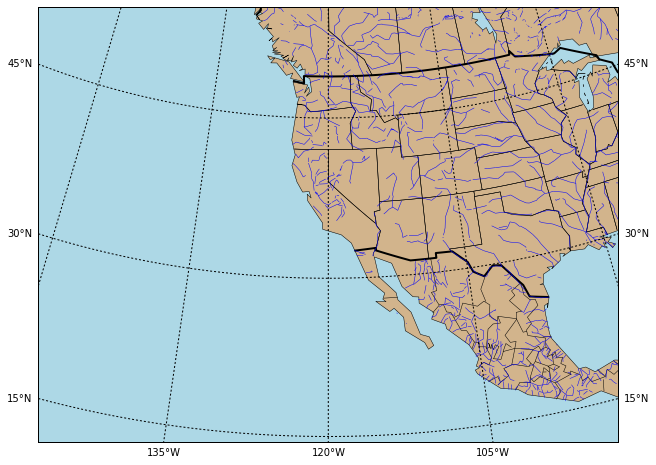

In [295]:
fig = plt.figure(num=None, figsize=(12, 8) ) 
m = Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lat_1=33.,lat_2=34,lon_0=-120,lat_0=35)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')

In [87]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [275]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
# import street map
street_map = gpd.read_file('/Users/vladimirant/Downloads/mygeodata/border_level8_polygon.shp')
'/Users/vladimirant/Downloads/City_Limits/City_Limits.shp'
street_map2 = gpd.read_file('/Users/vladimirant/Downloads/City_Limits/City_Limits.shp')

In [276]:
street_map2 = street_map2.to_crs(epsg=4326)

<AxesSubplot:>

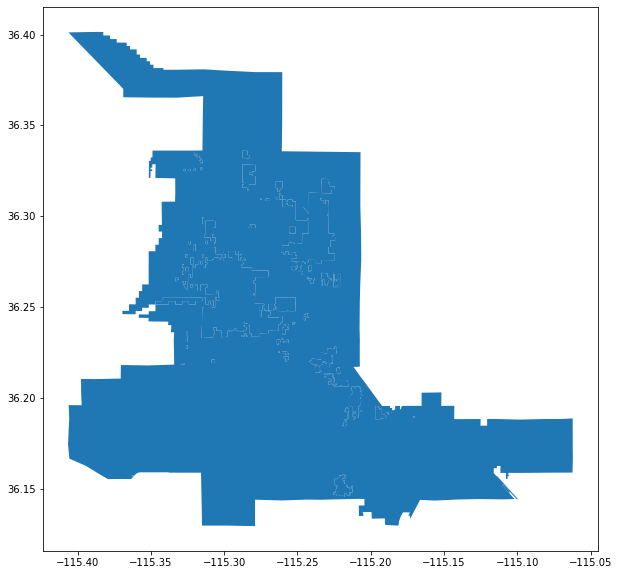

In [279]:
fig, ax=plt.subplots(figsize=(10,10))
street_map2.plot(ax=ax)

In [278]:
# designate coordinate system
crs = {'init':'espc:4326'}
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in data_WAL_id_18934['census_coord']]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(data_WAL_id_18934,
 crs = crs,
 geometry = geometry)

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


CRSError: Invalid projection: +init=espc:4326 +type=crs: (Internal Proj Error: proj_create: cannot expand +init=espc:4326 +type=crs)

/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


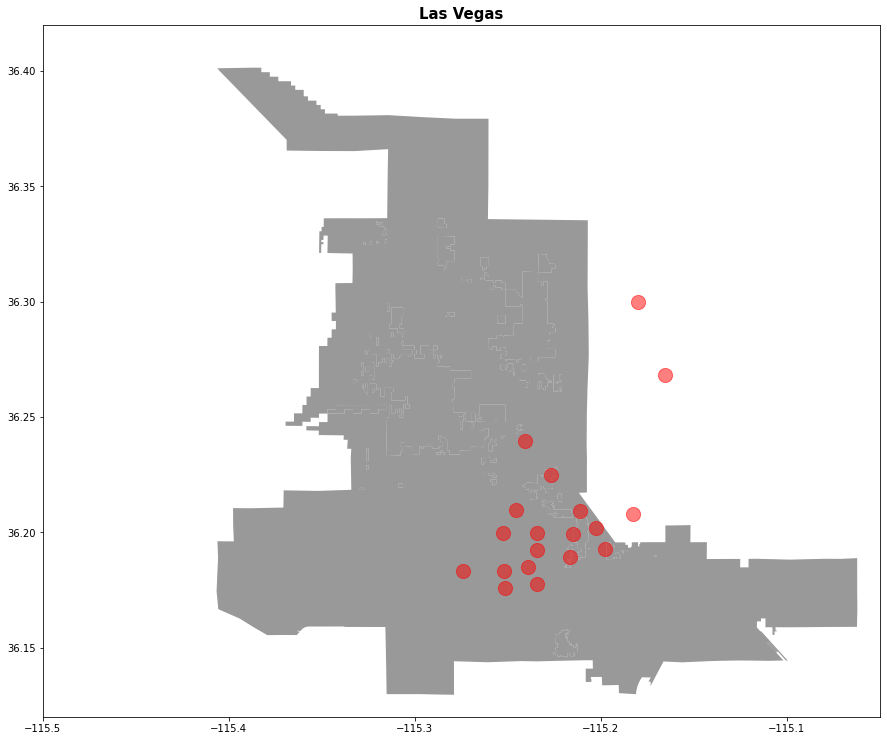

(36.271625, -115.271048)

In [304]:
crs={'init':'epsg:4326'}



# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map2.plot(ax=ax,alpha=0.8, color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='DemandM_2',ax=ax,alpha=0.5, legend=True,markersize=200, color='r')
# add title to graph
plt.title('Las Vegas', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-115.5,-115.05)
plt.ylim( 36.12,36.42)
# show map
plt.show()
Walmart_18394_coord

In [281]:
geometry = [Point(xy) for xy in zip(data_WAL_id_18934['ct_long'], data_WAL_id_18934['ct_lat'])]
#geometry = [Point(x,y) for x,y in data_WAL_id_18934['census_coord']]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(data_WAL_id_18934,
 crs = crs,
 geometry = geometry)

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [284]:
geo_df

,walmart_id,walmart_gps,walmart_ad1,walmart_ad2,walmart_ad3,walmart_zip,ct_geoid,ct_name,ct_county,ct_state,ct_lat,ct_long,ct_elderly_pop,distanceWtoCT,DemandM_1,DemandM_3,DemandM_2,census_coord,geometry
3839,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003003,Census Tract 30.03,Clark County,Nevada,36.183295,-115.252133,678,6.181276,68.0,204.0,136.0,"(36.1832951, -115.2521329)",POINT (-115.25213 36.18330)
3840,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003004,Census Tract 30.04,Clark County,Nevada,36.175886,-115.251746,263,6.688630,27.0,79.0,53.0,"(36.17588610000001, -115.2517457)",POINT (-115.25175 36.17589)
3841,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003102,Census Tract 31.02,Clark County,Nevada,36.177555,-115.234117,421,6.806273,43.0,127.0,85.0,"(36.17755529999999, -115.2341174)",POINT (-115.23412 36.17756)
3842,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003104,Census Tract 31.04,Clark County,Nevada,36.184877,-115.239212,520,6.240024,52.0,156.0,104.0,"(36.184877, -115.239212)",POINT (-115.23921 36.18488)
3843,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003220,Census Tract 32.20,Clark County,Nevada,36.183229,-115.273850,1089,6.096849,109.0,327.0,218.0,"(36.18322910000001, -115.2738498)",POINT (-115.27385 36.18323)
3845,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003409,Census Tract 34.09,Clark County,Nevada,36.239615,-115.240792,524,2.779599,53.0,158.0,105.0,"(36.2396146, -115.2407916)",POINT (-115.24079 36.23961)
3846,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003413,Census Tract 34.13,Clark County,Nevada,36.224943,-115.226604,682,4.064619,69.0,205.0,137.0,"(36.2249429, -115.2266042)",POINT (-115.22660 36.22494)
3847,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003415,Census Tract 34.15,Clark County,Nevada,36.209506,-115.245610,576,4.512591,58.0,173.0,116.0,"(36.2095059, -115.2456103)",POINT (-115.24561 36.20951)
3848,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003418,Census Tract 34.18,Clark County,Nevada,36.199778,-115.252466,232,5.061406,24.0,70.0,47.0,"(36.1997776, -115.2524662)",POINT (-115.25247 36.19978)
3849,18934,"[-115.271048, 36.271625]",8060 W TROPICAL PKWY,LAS VEGAS,CLARK,89149-4528,32003003419,Census Tract 34.19,Clark County,Nevada,36.199562,-115.234128,694,5.379693,70.0,209.0,139.0,"(36.1995618, -115.2341282)",POINT (-115.23413 36.19956)


In [108]:
pip install contextily

     |████████████████████████████████| 21.1 MB 4.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


TypeError: invalid path or file:     OBJECTID     PERIMETER  CNTY_IS  SYMBOL         ACRES    SQ_MILES  \
0        122  1.191754e+06        0      83  90878.102957  141.997036   
1        128  1.434950e+03       57       0      2.934148    0.004585   
2        129  1.504688e+03       57       0      3.216348    0.005026   
3        130  1.613602e+03       57       0      3.706768    0.005792   
4        131  2.149372e+03       57       0      3.503694    0.005475   
..       ...           ...      ...     ...           ...         ...   
82       230  4.738085e+03       57       0      2.591363    0.004049   
83       231  4.738085e+03       57       0      5.160831    0.008064   
84       232  2.685207e+03       57       0      5.084827    0.007945   
85       233  4.738085e+03       57       0      2.582527    0.004035   
86       234  5.347211e+03       57       0     15.468897    0.024170   

            AREA    SHAPE_Leng    SHAPE_Area  \
0   3.958821e+09  1.182778e+06  3.958634e+09   
1   1.278110e+05  1.434950e+03  1.278110e+05   
2   1.401036e+05  1.504688e+03  1.401036e+05   
3   1.614662e+05  1.613602e+03  1.614662e+05   
4   1.526203e+05  2.149372e+03  1.526203e+05   
..           ...           ...           ...   
82  6.749229e+05  1.344274e+03  1.128793e+05   
83  6.749229e+05  2.025272e+03  2.248049e+05   
84  4.509744e+05  1.999577e+03  2.214942e+05   
85  6.749229e+05  1.341372e+03  1.124944e+05   
86  8.988542e+05  2.680787e+03  3.368356e+05   

                                             geometry  
0   POLYGON ((-115.34695 36.25333, -115.34694 36.2...  
1   POLYGON ((-115.32651 36.32485, -115.32765 36.3...  
2   POLYGON ((-115.32405 36.32490, -115.32423 36.3...  
3   POLYGON ((-115.32057 36.32499, -115.32075 36.3...  
4   POLYGON ((-115.31590 36.32588, -115.31588 36.3...  
..                                                ...  
82  POLYGON ((-115.28490 36.23464, -115.28543 36.2...  
83  POLYGON ((-115.28606 36.23373, -115.28606 36.2...  
84  POLYGON ((-115.31262 36.28470, -115.31262 36.2...  
85  POLYGON ((-115.28374 36.23374, -115.28484 36.2...  
86  POLYGON ((-115.33098 36.26526, -115.33109 36.2...  

[87 rows x 10 columns]

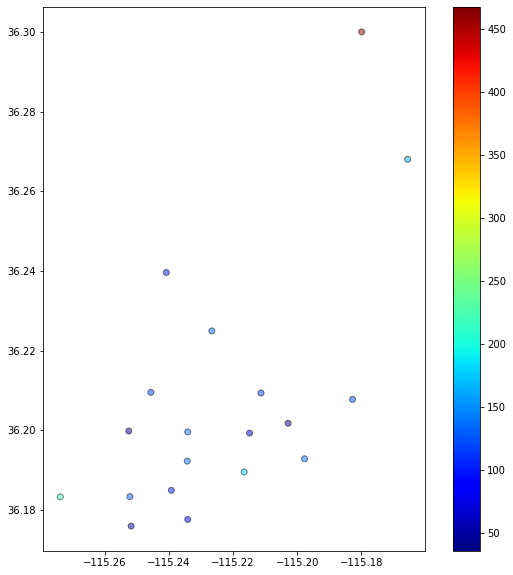

In [283]:
import contextily as cx
ax=geo_df.plot(figsize=(10,10),column='DemandM_2', cmap='jet', alpha=0.5,edgecolor='k',legend=True)
cx.add_basemap(ax,zoom=12,crs='EPSG:4326',source=street_map2)


In [132]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [141]:
usa_cities= gpd.read_file('/Users/vladimirant/Downloads/USA_Major_Cities/USA_Major_Cities.shx')

<AxesSubplot:>

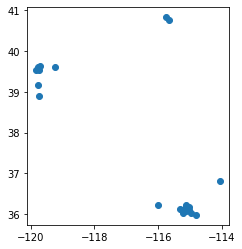

In [149]:
usa_cities[usa_cities.ST=='NV'].plot()

In [142]:
usa_cities

,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,POPULATION,POP2010,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,geometry
0,1,Ammon,city,ID,16,1601990,None,6,15181,13816,...,1131,106,335,3352,3.61,4747,271,3205,1271,POINT (-111.95410 43.47579)
1,2,Blackfoot,city,ID,16,1607840,None,6,11946,11899,...,1081,174,381,2958,3.31,4547,318,2788,1441,POINT (-112.34557 43.19394)
2,3,Boise City,city,ID,16,1608830,State,8,225405,205671,...,21233,2414,5919,50647,2.97,92700,6996,52345,33359,POINT (-116.23011 43.59901)
3,4,Burley,city,ID,16,1611260,None,6,10727,10345,...,861,139,358,2499,3.37,3885,241,2183,1461,POINT (-113.79329 42.53674)
4,5,Caldwell,city,ID,16,1612250,None,7,53942,46237,...,3113,686,1755,10776,3.51,16323,1428,9699,5196,POINT (-116.68562 43.66163)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,3882,Herndon,town,VA,51,5136648,None,6,23993,23292,...,1848,306,525,5357,3.46,7813,341,4558,2914,POINT (-77.38672 38.96993)
3882,3883,Highland Springs,Census Designated Place,VA,51,5137032,None,6,16618,15711,...,1187,206,1323,4157,3.03,6621,513,3795,2313,POINT (-77.32854 37.55172)
3883,3884,Hollins,Census Designated Place,VA,51,5137880,None,6,15033,14673,...,1806,115,413,3800,2.87,6435,385,4361,1689,POINT (-79.95348 37.34338)
3884,3885,Hopewell,city,VA,51,5138424,None,6,22935,22591,...,1963,305,1465,5877,3.00,10121,992,4906,4223,POINT (-77.29837 37.29038)


<AxesSubplot:>

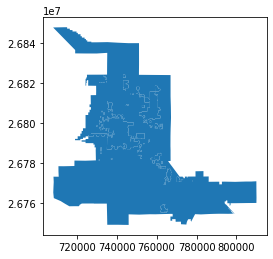

In [152]:
street_map2.plot()

/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


<AxesSubplot:>

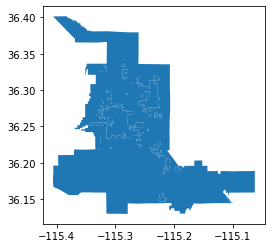

In [125]:
street_map2.plot()
geo_df.plot(column='DemandM_2',ax=ax,alpha=0.5, legend=True,markersize=10,marker='o',color='r')
